# Implementation of Convolutional Neural Networks

In [ ]:
!wget https://www.dropbox.com/s/31k0qimdnxo53rh/dogs-vs-cats.zip
!unzip "dogs-vs-cats.zip"
!rm "dogs-vs-cats.zip"
!unzip 'train.zip'
!unzip 'test1.zip'
!rm 'train.zip'
!rm 'test1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical,load_img
from sklearn.model_selection import train_test_split
import os

In [ ]:
Image_width = 128
Image_height = 128
Image_size = (Image_width , Image_height)
Image_channel = 3

Image_rgb_size = (Image_width ,Image_height , 3 )

In [ ]:
filenames = os.listdir('/content/train')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    categories.append(category)
data = pd.DataFrame({'filename' : filenames , 'category' : categories})
data.head()

,filename,category
0,dog.6405.jpg,dog
1,cat.9217.jpg,cat
2,dog.10574.jpg,dog
3,dog.6413.jpg,dog
4,dog.10792.jpg,dog


In [ ]:
data['category'].value_counts()

dog    12500
cat    12500
Name: category, dtype: int64

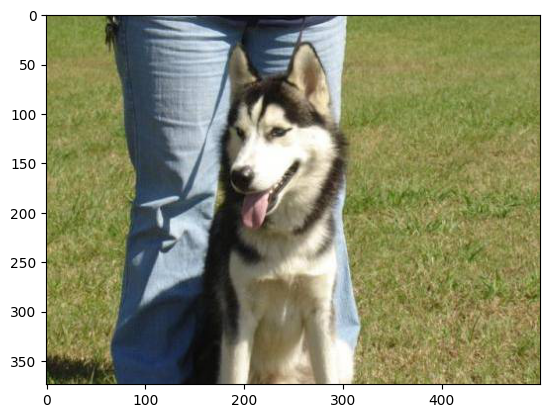

In [ ]:
import random
sample = random.choice(filenames)
image = load_img(f'train/{sample}')
plt.imshow(image)
plt.show()

In [ ]:
train_df , val_df = train_test_split(data , test_size = 0.2 , random_state = 42)
train_df = train_df.reset_index(drop = True)
val_df = val_df.reset_index(drop = True)

In [ ]:
train_df.shape , val_df.shape

((20000, 2), (5000, 2))

In [ ]:
train_df.head()

,filename,category
0,cat.12211.jpg,cat
1,cat.4479.jpg,cat
2,dog.11367.jpg,dog
3,dog.7499.jpg,dog
4,dog.11025.jpg,dog


In [ ]:
batch_size  = 32
epochs = 7
total_train = train_df.shape[0]
total_validate = val_df.shape[0]

In [ ]:
train_dategen = ImageDataGenerator(rotation_range = 15 ,
                                  rescale = 1.0/255 ,
                                  shear_range = 0.1,
                                  zoom_range = 0.2 ,
                                  horizontal_flip = True ,
                                  width_shift_range = 0.1 ,
                                  height_shift_range = 0.1
                                  )

In [ ]:
train_generator = train_dategen.flow_from_dataframe(
    train_df,
    "/content/train",
    x_col='filename',
    y_col='category',
    target_size=Image_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = validation_datagen.flow_from_dataframe(
    val_df,
    "/content/train",
    x_col='filename',
    y_col='category',
    target_size=Image_size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout , Flatten , Dense , Activation , BatchNormalization

model = Sequential()
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid', input_shape=(128,128,3)))
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid'))
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid'))
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid'))
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1, 1),padding='valid'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 10)      280       
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 10)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 59, 59, 10)        910       
                                                                 
 conv2d_5 (Conv2D)           (None, 57, 57, 10)        910       
                                                      

In [ ]:
from tensorflow.keras.optimizers import Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
total_train = train_df.shape[0]
total_validate = val_df.shape[0]

history = model.fit(train_generator,epochs=epochs,
                    validation_data = val_generator,
                    validation_steps = total_validate//batch_size,
                    steps_per_epoch = total_train//batch_size)

Epoch 1/7
625/625 [==============================] - 169s 249ms/step - loss: 0.6554 - accuracy: 0.6029 - val_loss: 0.6235 - val_accuracy: 0.6436
Epoch 2/7
625/625 [==============================] - 161s 256ms/step - loss: 0.6114 - accuracy: 0.6631 - val_loss: 0.6239 - val_accuracy: 0.6585
Epoch 3/7
625/625 [==============================] - 150s 240ms/step - loss: 0.5890 - accuracy: 0.6795 - val_loss: 0.6072 - val_accuracy: 0.6739
Epoch 4/7
625/625 [==============================] - 146s 233ms/step - loss: 0.5745 - accuracy: 0.6949 - val_loss: 0.5735 - val_accuracy: 0.6947
Epoch 5/7
625/625 [==============================] - 146s 234ms/step - loss: 0.5695 - accuracy: 0.7016 - val_loss: 0.5689 - val_accuracy: 0.6997
Epoch 6/7
625/625 [==============================] - 147s 235ms/step - loss: 0.5603 - accuracy: 0.7080 - val_loss: 0.5495 - val_accuracy: 0.7121
Epoch 7/7
625/625 [==============================] - 140s 224ms/step - loss: 0.5510 - accuracy: 0.7141 - val_loss: 0.5461 - val_ac

# Transfer Learning

In [ ]:
import tensorflow as tf
base = tf.keras.applications.resnet50.ResNet50(weights = 'imagenet' , include_top = False ,
                                                       input_shape = Image_rgb_size)

x = base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(2, activation= 'softmax')(x)
model = Model(inputs = base.input, outputs = predictions)


from tensorflow.keras.optimizers import Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
mc = ModelCheckpoint(
        "resnet_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
callbacks = [earlystop , learning_rate_reduction,mc]

In [ ]:
history = model.fit(
    train_generator ,
    epochs = epochs ,
    validation_data=val_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/7
625/625 [==============================] - ETA: 0s - loss: 0.2278 - accuracy: 0.9114

625/625 [==============================] - 215s 272ms/step - loss: 0.2278 - accuracy: 0.9114 - val_loss: 0.6284 - val_accuracy: 0.6032 - lr: 1.0000e-04
Epoch 2/7
625/625 [==============================] - ETA: 0s - loss: 0.0989 - accuracy: 0.9610

625/625 [==============================] - 169s 271ms/step - loss: 0.0989 - accuracy: 0.9610 - val_loss: 0.0815 - val_accuracy: 0.9675 - lr: 1.0000e-04
Epoch 3/7
625/625 [==============================] - ETA: 0s - loss: 0.0759 - accuracy: 0.9712

625/625 [==============================] - 169s 269ms/step - loss: 0.0759 - accuracy: 0.9712 - val_loss: 0.0749 - val_accuracy: 0.9714 - lr: 1.0000e-04
Epoch 4/7
625/625 [==============================] - ETA: 0s - loss: 0.0672 - accuracy: 0.9736

625/625 [==============================] - 162s 260ms/step - loss: 0.0672 - accuracy: 0.9736 - val_loss: 0.0786 - val_accuracy: 0.9706 - lr: 1.0000e-04
Epoch 5/7
625/625 [==============================] - ETA: 0s - loss: 0.0568 - accuracy: 0.9784

625/625 [==============================] - 169s 270ms/step - loss: 0.0568 - accuracy: 0.9784 - val_loss: 0.0753 - val_accuracy: 0.9724 - lr: 1.0000e-04
Epoch 6/7
625/625 [==============================] - ETA: 0s - loss: 0.0567 - accuracy: 0.9784

625/625 [==============================] - 163s 260ms/step - loss: 0.0567 - accuracy: 0.9784 - val_loss: 0.1137 - val_accuracy: 0.9621 - lr: 1.0000e-04
Epoch 7/7
625/625 [==============================] - ETA: 0s - loss: 0.0505 - accuracy: 0.9815

625/625 [==============================] - 163s 260ms/step - loss: 0.0505 - accuracy: 0.9815 - val_loss: 0.0753 - val_accuracy: 0.9732 - lr: 1.0000e-04


In [ ]:
test_filenames = os.listdir('/content/test1')
test = pd.DataFrame({'filename' : test_filenames})
nb_samples = test.shape[0]

In [ ]:
test.head()

,filename
0,6578.jpg
1,3396.jpg
2,10016.jpg
3,1100.jpg
4,11077.jpg


In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test ,
    '/content/test1' ,
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=Image_size,
    batch_size=batch_size,
    shuffle=False
    )

Found 12500 validated image filenames.


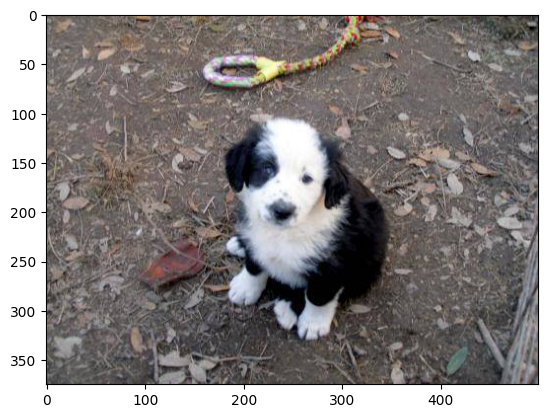

In [ ]:
img_id = '1366.jpg'
image = load_img(f'/content/test1/{img_id}')
plt.imshow(image)

In [ ]:
from tensorflow.keras.applications.resnet import preprocess_input

In [ ]:
labels = {0:'Cats',1:'Dogs'}

1/1 [==============================] - 2s 2s/step
Predicton from model is Dogs


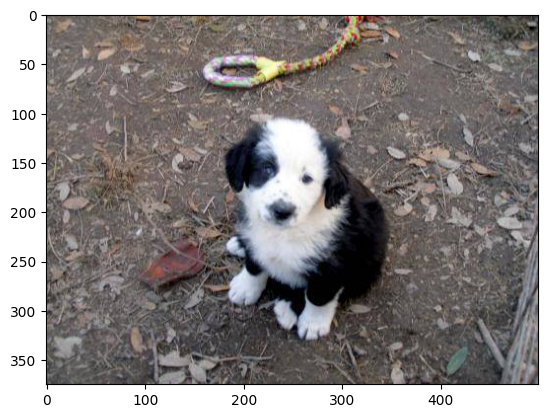

In [ ]:
img_id = '1366.jpg'
image = load_img(f'/content/test1/{img_id}')
plt.imshow(image)

path = f'/content/test1/{img_id}'
img = load_img(path, target_size=Image_size)
import numpy as np
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)
pred = model.predict(X)
print(f"Predicton from model is {labels[pred[0].argmax()]}")

In [ ]:
predict = model.predict(test_generator , steps = np.ceil(nb_samples/batch_size))
test['category'] = np.argmax(predict  , axis= -1)
test.head()

391/391 [==============================] - 44s 109ms/step


,filename,category
0,6578.jpg,0
1,3396.jpg,1
2,10016.jpg,0
3,1100.jpg,1
4,11077.jpg,0
